In [2]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stats
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ast
import json
%matplotlib inline

In [7]:
os.getcwd()

'/Users/ryanfisher/Documents/Springboard/Springboard/Capstone 2/3405-6663-bundle-archive'

In [8]:
os.listdir('/Users/ryanfisher/Documents/Springboard/Springboard/Capstone 2/3405-6663-bundle-archive')

['links_small.csv',
 'Top_1000_Actors_Actresses.csv',
 'links.csv',
 'credits.csv',
 'Capstone 2 - Data Wrangling.ipynb',
 'movies_credits_actors',
 'Capstone 2 - EDA.ipynb',
 'Capstone 2 - Feature Engineering.ipynb',
 'credits.csv.zip',
 'movies_metadata.csv',
 'ratings.csv',
 'Capstone 2 - Modeling.ipynb',
 '.ipynb_checkpoints',
 'movies_credits',
 'ratings_small.csv',
 'keywords.csv']

In [190]:
movies_credits_actors = pd.read_csv('movies_credits_actors', header = 0,index_col = 'movieId')

In [165]:
movies_credits_actors

,adult,budget,imdb_id,original_language,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,cast,new_genres,collection,director,a_list_sum,b_list_sum
movieId,,,,,,,,,,,,,,,,,,
862,False,30000000.0,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,"Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wal...",Animation,Toy Story Collection,John Lasseter,1,1
8844,False,65000000.0,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,"Robin Williams,Jonathan Hyde,Kirsten Dunst,Bra...",Adventure,NaN,Joe Johnston,2,1
15602,False,0.0,tt0113228,en,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,"Walter Matthau,Jack Lemmon,Ann-Margret,Sophia ...",Romance,Grumpy Old Men Collection,Howard Deutch,4,0
31357,False,16000000.0,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,"Whitney Houston,Angela Bassett,Loretta Devine,...",Comedy,NaN,Forest Whitaker,1,1
11862,False,0.0,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,"Steve Martin,Diane Keaton,Martin Short,Kimberl...",Comedy,Father of the Bride Collection,Charles Shyer,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439050,False,0.0,tt6209470,fa,0.072051,[],NaN,0.0,90.0,Subdue,4.0,1.0,"Leila Hatami,Kourosh Tahami,Elham Korda",Drama,NaN,Hamid Nematollah,0,0
111109,False,0.0,tt2028550,tl,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]",2011-11-17,0.0,360.0,Century of Birthing,9.0,3.0,"Angel Aquino,Perry Dizon,Hazel Orencio,Joel To...",Drama,NaN,Lav Diaz,0,0
67758,False,0.0,tt0303758,en,0.903007,"[{'name': 'American World Pictures', 'id': 6165}]",2003-08-01,0.0,90.0,Betrayal,3.8,6.0,"Erika Eleniak,Adam Baldwin,Julie du Page,James...",Action,NaN,Mark L. Lester,0,0


In [191]:
movies_credits_actors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45538 entries, 862 to 461257
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45538 non-null  bool   
 1   budget                45538 non-null  float64
 2   imdb_id               45521 non-null  object 
 3   original_language     45527 non-null  object 
 4   popularity            45535 non-null  float64
 5   production_companies  45535 non-null  object 
 6   release_date          45451 non-null  object 
 7   revenue               45535 non-null  float64
 8   runtime               45278 non-null  float64
 9   title                 45535 non-null  object 
 10  vote_average          45535 non-null  float64
 11  vote_count            45535 non-null  float64
 12  cast                  43118 non-null  object 
 13  new_genres            43096 non-null  object 
 14  collection            4500 non-null   object 
 15  director        

In [176]:
ratings = pd.read_csv('ratings.csv', header = 0,index_col = 'movieId')

/Users/ryanfisher/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [177]:
ratings.sort_index()

,userId,rating,timestamp
movieId,,,
1,46848,4.0,1501544252
1,226491,4.0,918670493
1,226490,5.0,1454045658
1,121018,2.0,1451028121
1,30092,3.0,855598451
...,...,...,...
176267,189131,4.0,1501746426
176269,97528,3.5,1501764806
176271,837,5.0,1501765780


In [178]:
ratings = ratings.groupby(ratings.index).mean()

In [179]:
ratings = ratings['rating']

In [181]:
ratings

movieId
1         3.888157
2         3.236953
3         3.175550
4         2.875713
5         3.079565
            ...   
176267    4.000000
176269    3.500000
176271    5.000000
176273    1.000000
176275    3.000000
Name: rating, Length: 45115, dtype: float64

In [182]:
movies_credits_actors_ratings = movies_credits_actors.merge(ratings, on='movieId')

In [183]:
movies_credits_actors_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7579 entries, 862 to 111109
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 7579 non-null   bool   
 1   budget                7579 non-null   float64
 2   imdb_id               7577 non-null   object 
 3   original_language     7578 non-null   object 
 4   popularity            7579 non-null   float64
 5   production_companies  7579 non-null   object 
 6   release_date          7571 non-null   object 
 7   revenue               7579 non-null   float64
 8   runtime               7560 non-null   float64
 9   title                 7579 non-null   object 
 10  vote_average          7579 non-null   float64
 11  vote_count            7579 non-null   float64
 12  cast                  7311 non-null   object 
 13  new_genres            7208 non-null   object 
 14  collection            949 non-null    object 
 15  director         

In [157]:
movies_credits_actors_ratings

,adult,budget,imdb_id,original_language,popularity,production_companies,release_date,revenue,runtime,title,...,vote_count,cast,new_genres,collection,director,a_list_sum,b_list_sum,userId,rating,timestamp
movieId,,,,,,,,,,,,,,,,,,,,,
862,False,30000000.0,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,81.0,Toy Story,...,5415.0,"Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wal...",Animation,Toy Story Collection,John Lasseter,1,1,133828.86631,3.598930,9.727758e+08
8844,False,65000000.0,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,262797249.0,104.0,Jumanji,...,2413.0,"Robin Williams,Jonathan Hyde,Kirsten Dunst,Bra...",Adventure,NaN,Joe Johnston,2,1,138698.00813,3.760163,1.268060e+09
15602,False,0.0,tt0113228,en,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995-12-22,0.0,101.0,Grumpier Old Men,...,92.0,"Walter Matthau,Jack Lemmon,Ann-Margret,Sophia ...",Romance,Grumpy Old Men Collection,Howard Deutch,4,0,NaN,NaN,NaN
31357,False,16000000.0,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,81452156.0,127.0,Waiting to Exhale,...,34.0,"Whitney Houston,Angela Bassett,Loretta Devine,...",Comedy,NaN,Forest Whitaker,1,1,NaN,NaN,NaN
11862,False,0.0,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995-02-10,76578911.0,106.0,Father of the Bride Part II,...,173.0,"Steve Martin,Diane Keaton,Martin Short,Kimberl...",Comedy,Father of the Bride Collection,Charles Shyer,2,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439050,False,0.0,tt6209470,fa,0.072051,[],NaN,0.0,90.0,Subdue,...,1.0,"Leila Hatami,Kourosh Tahami,Elham Korda",Drama,NaN,Hamid Nematollah,0,0,NaN,NaN,NaN
111109,False,0.0,tt2028550,tl,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]",2011-11-17,0.0,360.0,Century of Birthing,...,3.0,"Angel Aquino,Perry Dizon,Hazel Orencio,Joel To...",Drama,NaN,Lav Diaz,0,0,153434.00000,2.583333,1.423825e+09
67758,False,0.0,tt0303758,en,0.903007,"[{'name': 'American World Pictures', 'id': 6165}]",2003-08-01,0.0,90.0,Betrayal,...,6.0,"Erika Eleniak,Adam Baldwin,Julie du Page,James...",Action,NaN,Mark L. Lester,0,0,NaN,NaN,NaN


In [195]:
movies_credits_actors2 = movies_credits_actors[['revenue','popularity','budget','runtime', 'vote_average','vote_count','a_list_sum', 'b_list_sum']]

In [197]:
movies_credits_actors2

,revenue,popularity,budget,runtime,vote_average,vote_count,a_list_sum,b_list_sum
movieId,,,,,,,,
862,373554033.0,21.946943,30000000.0,81.0,7.7,5415.0,1,1
8844,262797249.0,17.015539,65000000.0,104.0,6.9,2413.0,2,1
15602,0.0,11.712900,0.0,101.0,6.5,92.0,4,0
31357,81452156.0,3.859495,16000000.0,127.0,6.1,34.0,1,1
11862,76578911.0,8.387519,0.0,106.0,5.7,173.0,2,0
...,...,...,...,...,...,...,...,...
439050,0.0,0.072051,0.0,90.0,4.0,1.0,0,0
111109,0.0,0.178241,0.0,360.0,9.0,3.0,0,0
67758,0.0,0.903007,0.0,90.0,3.8,6.0,0,0


In [146]:
temp = movies_credits_actors2[(movies_credits_actors2['budget']!=0)|(movies_credits_actors2['revenue']!=0)]

In [147]:
temp

,revenue,popularity,budget,runtime,vote_average,vote_count,a_list_sum,b_list_sum
0,373554033.0,21.946943,30000000.0,81.0,7.7,5415.0,1,1
1,262797249.0,17.015539,65000000.0,104.0,6.9,2413.0,2,1
3,81452156.0,3.859495,16000000.0,127.0,6.1,34.0,1,1
4,76578911.0,8.387519,0.0,106.0,5.7,173.0,2,0
5,187436818.0,17.924927,60000000.0,170.0,7.7,1886.0,3,1
...,...,...,...,...,...,...,...,...
45474,0.0,0.524370,2000000.0,89.0,3.5,4.0,0,0
45480,0.0,0.380933,2000000.0,100.0,5.0,2.0,0,0
45481,1328612.0,0.903061,800000.0,100.0,5.8,6.0,0,0
45484,1268793.0,0.121844,2000000.0,107.0,4.0,3.0,0,0


In [130]:
movies_credits_actors2.dtypes

revenue         float64
popularity      float64
budget          float64
runtime         float64
vote_average    float64
vote_count      float64
a_list_sum        int64
b_list_sum        int64
dtype: object

In [207]:
#movies_credits_actors2 = movies_credits_actors.notna()
movies_credits_actors2.dropna(inplace=True)
X, y = movies_credits_actors2[['popularity','vote_count','a_list_sum', 'b_list_sum']], movies_credits_actors2['vote_average']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.0292137205447911

In [202]:
lr.score(X_test,y_test)

0.03388010237967265

In [203]:
lr.coef_

array([ 3.17404020e-02,  4.05126007e-04, -1.54562913e-09, -4.17995341e-09,
        1.90368922e-01,  8.15974106e-02])

In [208]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
regr.score(X_train, y_train)

0.586578911905355

In [209]:
regr.score(X_test,y_test)

0.5805305167543459

In [97]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [210]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
svr.score(X_train, y_train)

0.024061822996808258

In [98]:
lr_sc = LinearRegression()
lr_sc.fit(X_train_scaled, y_train)
lr_sc.score(X_train_scaled, y_train)

0.046137054219234974

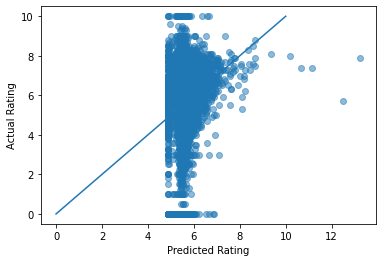

In [161]:
plt.scatter(test_set_pred, y_test, alpha=.5)
plt.plot(np.linspace(0,10), np.linspace(0,10))
plt.xlabel('Predicted Rating')
plt.ylabel('Actual Rating');

In [21]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[ 3623  3624  3625 ... 36219 36220 36221] [   0    1    2 ... 3620 3621 3622]
[    0     1     2 ... 36219 36220 36221] [3623 3624 3625 ... 7243 7244 7245]
[    0     1     2 ... 36219 36220 36221] [ 7246  7247  7248 ... 10865 10866 10867]
[    0     1     2 ... 36219 36220 36221] [10868 10869 10870 ... 14487 14488 14489]
[    0     1     2 ... 36219 36220 36221] [14490 14491 14492 ... 18109 18110 18111]
[    0     1     2 ... 36219 36220 36221] [18112 18113 18114 ... 21731 21732 21733]
[    0     1     2 ... 36219 36220 36221] [21734 21735 21736 ... 25353 25354 25355]
[    0     1     2 ... 36219 36220 36221] [25356 25357 25358 ... 28975 28976 28977]
[    0     1     2 ... 36219 36220 36221] [28978 28979 28980 ... 32597 32598 32599]
[    0     1     2 ... 32597 32598 32599] [32600 32601 32602 ... 36219 36220 36221]


In [22]:
scores = lr.score(X_test,y_test)#cross_val_score(regr, X, y, scoring='accuracy', cv=kf, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.049 (0.000)


In [171]:
multi_oscar_nom_dir = pd.DataFrame({'director':['William Wyler',
'Martin Scorsese',
'Billy Wilder',
'Woody Allen',
'David Lean',
'Steven Spielberg',
'Fred Zinnemann',
'Clarence Brown',
'Frank Capra',
'Robert Altman',
'George Cukor',
'Michael Curtiz',
'John Ford',
'Alfred Hitchcock',
'John Huston',
'Elia Kazan',
'Frank Lloyd',
'George Stevens',
'King Vidor',
'Francis Ford Coppola',
'Clint Eastwood',
'Federico Fellini',
'Stanley Kubrick',
'Sidney Lumet',
'Joseph L. Mankiewicz',
'Mike Nichols',
'Peter Weir']})

In [172]:
multi_oscar_nom_dir

,director
0,William Wyler
1,Martin Scorsese
2,Billy Wilder
3,Woody Allen
4,David Lean
5,Steven Spielberg
6,Fred Zinnemann
7,Clarence Brown
8,Frank Capra
9,Robert Altman


In [256]:
dir_list = []
for i in movies_credits_actors['director']:
    print(i)
    if i in multi_oscar_nom_dir['director']:
        dir_list.append(1)
    else:
        dir_list.append(0)

John Lasseter
Joe Johnston
Howard Deutch
Forest Whitaker
Charles Shyer
Michael Mann
Sydney Pollack
Peter Hewitt
Peter Hyams
Martin Campbell
Rob Reiner
Mel Brooks
Simon Wells
Oliver Stone
Renny Harlin
Martin Scorsese
Ang Lee
Quentin Tarantino
Steve Oedekerk
Joseph Ruben
Barry Sonnenfeld
Jon Amiel
Richard Donner
Victor Salva
Mike Figgis
Oliver Parker
Lesli Linka Glatter
Roger Michell
Marc Caro
Zhang Yimou
John N. Smith
Terry Gilliam
Jean-Jacques Annaud
Chris Noonan
Christopher Hampton
Tim Robbins
Stephen Low
Andy Tennant
Amy Heckerling
Darrell James Roodt
Richard Loncraine
Allen Hughes
Michael Hoffman
Paul W.S. Anderson
Gus Van Sant
Jocelyn Moorhouse
David Fincher
Eric Goldberg
Patricia Rozema
Bryan Singer
Richard W. Munchkin
Woody Allen
Gianni Amelio
Holly Goldberg Sloan
Ulu Grosbard
Robert Tinnell
Jodie Foster
Michael Radford
Robert Lepage
Frank Oz
John Schlesinger
Stephen Herek
Paris Barclay
Bill Bennett
Jason Bloom
Farhad Mann
James Foley
Josiane Balasko
F. Gary Gray
Robert Rodriguez

Simon Wincer
Margarethe von Trotta
Margarethe von Trotta
Margarethe von Trotta
Margarethe von Trotta
Richard Benjamin
Norberto Barba
Eli Cohen
Robert Mandel
Pat Verducci
Michael Winterbottom
Steven Baigelman
Zalman King
Barry Caillier
Patrick Read Johnson
Stijn Coninx
John Cassavetes
Stacy Cochran
Jean-Claude Van Damme
Mark Joffe
Steve Gomer
Lee Tamahori
Michael Lehmann
George Scribner
Tom DeCerchio
Alan Shapiro
Angela Pope
Betty Kaplan
Jim Jarmusch
Jean-Paul Rappeneau
Jack Hill 
Manuel Gómez Pereira
Jean-Marie Poiré
Harold Ramis
Brett Thompson
Spiro Scimone
Andrew Fleming
Reginald Hudlin
Bruce Beresford
nan
John Schlesinger
Timothy Quay
Phil Joanou
Larry Cohen
Michael Bay
Harvey Miller
Michele Soavi
Jan de Bont
David Hogan
Maurice Pialat
Gabriel Barylli
Mamoru Oshii
Tom Holland
Rick Friedberg
Udayan Prasad
Nick Park
Abraham Polonsky
John Landis
David Twohy
Robert Z. Leonard
Stanley Kubrick
Guy Maddin
John O'Brien
John Irvin
Kevin James Dobson
Victor Saville
Helena Solberg
Wong Kar-wai

Gregory Hoblit
Stefan Schwartz
Greg Spence
Wong Kar-wai
Bruno Barreto
Bob Spiers
Stephen Sommers
Brian Evans
Bret Michaels
Charlie Peters
Alexander Sokurov
Antoine Fuqua
Michael Radford
Mark Pavia
John Landis
Shinya Tsukamoto
Millicent Shelton
Frank Coraci
Barry Levinson
Michael Paxton
Robert Dornhelm
Roberto Benabib
Volker Schlöndorff
James L. Brooks
Abel Ferrara
nan
Kari Skogland
Robert Benton
Stuart Baird
Stephan Elliott
Richard Kwietniowski
Jorge Fons
Zalman King
Greg MacGillivray
Jonathan Darby
Peter O'Fallon
Randall Wallace
Richard Linklater
John McNaughton
John Roberts
John N. Smith
Takeshi Kitano
Mike Nichols
Bob Gosse
M. Night Shyamalan
Boaz Yakin
Howard Goldberg
James Toback
Edward Burns
Jonathan Demme
Lesli Linka Glatter
Nicholas Hytner
Steve Boyum
Stephen Gyllenhaal
Ice Cube
Steve Gomer
Michael Moore
Wayne Wang
Stephen Hopkins
Craig Lahiff
Harold Becker
David Mamet
Brad Silberling
Whit Stillman
Howard Deutch
Michael Lehmann
Spike Lee
Robert Altman
Nick Gomez
Barnet Kellman


Ted Post
Gréta Olafsdóttir
Richard Spence
John Cassavetes
Anthony Harvey
Danny Boyle
Chris Koch
Jun Falkenstein
Madhur Jaffrey
Zhang Yimou
Tina Valinsky
Rob Hardy
Joseph H. Lewis
Lynn Hershman Leeson
Tobe Hooper
Ken Loach
James Clavell
Julian Johnson
Ben Younger
Diane Keaton
David Twohy
Jonathan Lynn
Jasmin Dizdar
Steven Okazaki
Paul Schrader
Edgar G. Ulmer
Charlie Chaplin
Charlie Chaplin
Garry Marshall
Charlie Chaplin
Charlie Chaplin
Anthony Mann
Max Baer, Jr.
Michael Miller
Felix E. Feist
H. Bruce Humberstone
John Frankenheimer
Curtis Hanson
Rod Lurie
Eric Mendelsohn
Søren Kragh-Jacobsen
Ken Liotti
DJ Pooh
Patrick von Krusenstjerna
Nick Gomez
John Schlesinger
Mike Nichols
Barry W. Blaustein
Jim Jarmusch
John Duigan
Elia Kazan
George Bowers
Jack Couffer
Robert Aldrich
John Huston
Edward D. Wood Jr.
Andrew Mollo
Michael Winner
Al Reinert
Sam Peckinpah
Edward D. Wood Jr.
George Cukor
Alan Parker
Roger Vadim
Herschell Gordon Lewis
Winston Hibler
Herschell Gordon Lewis
Carroll Ballard
Lás

Tony Bill
Richard Quine
Leos Carax
Federico Fellini
Mark Rydell
Colin Higgins
Martin Ritt
Carl Reiner
Roy Rowland
Dennis Hopper
Arthur Hiller
Bille August
Jules Dassin
Brian Helgeland
Ken Loach
Fernando Trueba
Kristian Levring
Del Shores
Jehane Noujaim
Luis Mandoki
Vicky Jenson
Amos Kollek
Baz Luhrmann
Jacques Doillon
Michael Bay
Karin Julsrud
Michel Debats
Sally Potter
Jim McKay
nan
Donald Wrye
Dale Launer
Mike Nichols
Robert Aldrich
Robert Altman
Ron Underwood
John Sayles
John Ford
Burt Lancaster
Michelangelo Antonioni
Alan Parker
John Sturges
Burt Kennedy
Howard Hawks
Josef von Sternberg
Michael Ritchie
Peter Yates
Danny DeVito
Edward Yang
David Wechter
Ole Bornedal
Robert Wise
Henry King
Mark Robson
Luke Greenfield
Sam Weisman
Thomas Bezucha
Ivan Reitman
Dominic Sena
Jennifer Jason Leigh
Bruce Beresford
Jan Hřebejk
Peter Hewitt
Mike Nichols
Peter Jackson
Kathryn Bigelow
Zelda Barron
Ted Kotcheff
Jonathan Kaplan
Peter Markle
Howard Hawks
Jean Negulesco
William Castle
Billy Wilder
Wa

Peter Cattaneo
Olivier Assayas
James Foley
Pierce Rafferty
Robert Rossen
Nathan H. Juran
Akira Kurosawa
George Roy Hill
Roger Michell
Bill Paxton
Zoe Clarke-Williams
Roger Kumble
Peter Bogdanovich
Michel Gondry
Joel Zwick
Delmer Daves
Richard Brooks
Tom Gries
John Patrick Shanley
Roberto Rossellini
John De Bello
Bill Froehlich
Arthur Hiller
Leonard Nimoy
Emile Ardolino
Rudy De Luca
John Hough
Barbet Schroeder
Chuck Russell
Walter Salles
Ethan Hawke
Michael Apted
Anne-Sophie Birot
Jon Purdy
Fabián Bielinsky
nan
Clare Peploe
Bart Freundlich
James Isaac
Stephen Herek
Stacy Peralta
Arlene Sanford
Jean-Luc Godard
Christine Jeffs
D.J. Caruso
Henry Barrial
Bryan Johnson
George T. Miller
Jean-Pierre Melville
Roger Donaldson
Dusan Makavejev
Richard Lester
Tom Mankiewicz
Peter Masterson
Woody Allen
John G. Avildsen
Bob Fosse
John McTiernan
Tom Holland
Douglas Day Stewart
Robert M. Young
Zalman King
Scott Kalvert
Woody Allen
Sam Raimi
Ismail Merchant
Shôhei Imamura
Michael Winner
Milton Katselas


F. Gary Gray
Joel Schumacher
Josée Dayan
Shinichiro Watanabe
George Gallo
Ed Solomon
Aki Kaurismäki
Peter Segal
Justin Lin
James Cameron
Rob Zombie
Lukas Moodysson
Wiebke von Carolsfeld
Austin Chick
Paul Hunter
Linda Mendoza
Christopher Guest
Andrew Davis
John Whitesell
Jacques Perrin
Anders Thomas Jensen
Sam Peckinpah
Bert I. Gordon
Robert Wise
John Flynn
François Truffaut
Sam Jones
John Frankenheimer
Ivan Reitman
Arthur Hiller
Henry Winkler
Mitch Davis
Malcolm Mowbray
Carl Reiner
Herbert Ross
Michael Ritchie
Sidney Lumet
Philippe de Broca
Jerry Rees
Gérard Lauzier
Paul Mazursky
John Erman
James Foley
James Mangold
Fred Schepisi
Rick de Oliveira
Matt Dillon
Richard LaGravenese
Andrei Konchalovsky
Jordan Melamed
Daniel Algrant
Jeffrey Blitz
Jim Fall
Bryan Singer
Karen Moncrieff
John Malkovich
Bahman Ghobadi
Richard Kwietniowski
Steve Carr
Patrice Leconte
D.A. Pennebaker
Neil LaBute
Miles Swain
Alfredo De Villa
Baltasar Kormákur
Richard Attenborough
Julien Temple
Stan Lathan
Sam Firsten

Peter Medak
Willard Huyck
Peter Segal
Donald Petrie
Lucas Belvaux
nan
Bent Hamer
Manuel Boursinhac
François Dupeyron
Richard C. Sarafian
Robert Bresson
Raoul Walsh
George Stevens
Bruno Bozzetto
Bob Rafelson
Luis Estrada
Paul Verhoeven
J. Lee Thompson
Albert Parker
John Irvin
Sam Wood
Norman Tokar
David Green
Greg Pak
Charles S. Dutton
Sara Sugarman
Jeff Schaffer
Mel Gibson
Jay Chandrasekhar
Guy Ferland
Philip Kaufman
Amos Gitai
Wolfgang Becker
Joe Johnston
Todd Phillips
Paul McGuigan
Ingmar Bergman
Ingmar Bergman
Edward Dmytryk
Stuart Heisler
Ingmar Bergman
Robert Parrish
Henri-Georges Clouzot
Martin Ritt
Samuel Fuller
Luchino Visconti
Alan Jacobs
Laurence Olivier
James Ivory
Lisa Gottlieb
Arthur Penn
Pen Densham
James Marsh
Cliff Owen
Kevin Allen
Luke Greenfield
David Koepp
David Mamet
Nir Bergman
James Ronald Whitney
nan
Lone Scherfig
Paul Flaherty
John McNaughton
Terry Jones
Delbert Mann
Mark Robson
Rosanna Arquette
Melvin Frank
Zack Snyder
Michel Gondry
D.J. Caruso
Kai S. Pieck
Joh

Alexander Witt
Gregory Jacobs
Enid Zentelis
Charles Stone III
Kerry Conran
Richard Loncraine
Catherine Breillat
John Duigan
Forest Whitaker
Joseph Ruben
Jeff Nathanson
John Waters
Walter Salles
Edgar Wright
Daniel Mann
Martin Ritt
H. C. Potter
Eric Louzil
Sidney Lumet
Peter Bogdanovich
Henry King
Richard Fleischer
Charles Jarrott
Stan Dragoti
Michael Winner
Bernard L. Kowalski
Christopher Crowe
Marc Fusco
Richard Marquand
Roy Del Ruth
Robert Greenwald
Frank Henenlotter
Frank Henenlotter
Michael Anderson
Duncan Roy
Gene Fowler Jr.
Mihalis Kakogiannis
Luis Buñuel
Paul Schrader
Melvin Van Peebles
William Tannen
Jeannot Szwarc
Roger Corman
Steve Latshaw
Ridley Scott
Ruggero Deodato
Rob Letterman
Jay Russell
Ricky Schroder
David O. Russell
Sean McNamara
Tim Story
Jordan Roberts
Shane Carruth
Richard Eyre
Peter Chelsom
Trey Parker
Michael Clancy
Dylan Kidd
George Seaton
Daniel Mann
Lars von Trier
Roman Polanski
Robert Zemeckis
Roger Spottiswoode
Richard Moore
Paul Bartel
Roman Polanski
James

Steve Barron
James Dearden
Lawrence O'Neil
Rowdy Herrington
Peter Thorwarth
Boyd Kirkland
Richard Benjamin
Nettie Wild
Gregor Jordan
Leslie Libman
Dave Payne
Scott Sanders
Léa Pool
Lodge Kerrigan
Nobuo Nakagawa
nan
Claude Miller
Hou Hsiao-hsien
Tsai Ming-liang
Aleksey Balabanov
Marc Rothemund
Uli Edel
Aki Kaurismäki
Toshiya Fujita
Aleksi Mäkelä
Joe Chappelle
Nicolas Winding Refn
Mani Ratnam
Ryuichi Takamori
Pitof
Paul Cox
Turi Meyer
nan
Perttu Leppä
Toshihiko Masuda
Kazuya Tsurumaki
Jari Halonen
Karan Monkhouse
Karan Johar
Roy Frumkes
Tonie Marshall
Geoffrey Wright
Matthew Bright
David Mallet
Tony Silver
Fatih Akin
Christian Duguay
Michel Ocelot
Takashi Koizumi
Patrick Lussier
Gérard Krawczyk
Ash Baron-Cohen
Aleksandr Rogozhkin
Kimble Rendall
Amos Gitai
Terry Winsor
Alfonso Aráu
Markku Pölönen
Matti Ijäs
Grant Gee
Roger Kumble
Shinobu Yaguchi
Bruno Dumont
Stephen Metcalfe
Vince Offer
Richard Benjamin
Kiyoshi Kurosawa
Adrian Edmondson
Robert J. Siegel
Martha Coolidge
Terry L. Noss
Herbe

Angela Robinson
Sally Potter
George A. Romero
Nora Ephron
David LaChapelle
Tony Gatlif
Chris Smith
Rouben Mamoulian
Mario Bava
Henry Hathaway
Miranda July
Álex de la Iglesia
Fruit Chan
Yvan Attal
Jeff Lieberman
Hans Weingartner
Robert Wise
Paul Mazursky
John Cromwell
Fred Zinnemann
Claudio Fäh
Christopher Kulikowski
Roger Nygard
Bruce Campbell
Robert Aldrich
Joan Rivers
Jan Troell
Irving Rapper
Archie Mayo
Henry Winkler
Alan Rudolph
Vincente Minnelli
Peter Yates
Keva Rosenfeld
Dick Maas
Damian Harris
William A. Seiter
Richard Greenberg
Paolo Virzì
Mario Monicelli
Edward Buzzell
John Flynn
Mick Davis
Norman Taurog
Roland Suso Richter
Steven Spielberg
Gillian Armstrong
Yoshimitsu Banno
Ronald Neame
Ken Russell
Jérôme Maison
Benoît Jacquot
Alan Wade
Brian Flemming
Robert Clouse
Steve Carr
Shemi Zarhin
Andrei Konchalovsky
Walter Salles
Jacques Audiard
Tim Story
Dana Adam Shapiro
Ingmar Bergman
Bob Gosse
David Dobkin
Don Roos
Don Chaffey
Robert Wise
Lee Grant
John Paragon
Curtis Bernhardt
C

Carlos Sorin
Takashi Miike
Breck Eisner
Deepa Mehta
Allan Arkush
Marc Rothemund
George W. Hill
Ere Kokkonen
Aleksi Mäkelä
Roger Donaldson
Wong Kar-wai
Espen Sandberg
Alan Clarke
Michael Winterbottom
Frank Capra
Éric Rohmer
Richard Schickel
Daniel MacIvor
Rintaro Mayuzumi
John Gray
Patrice Leconte
Justin Lin
John Whitesell
Kirk Jones
Robert Ellis Miller
Amanda Micheli
John Fawcett
Ray Milland
Frank Capra
Andrew L. Stone
David Butler
Victor Saville
Byron Paul
George Sidney
Michael Blieden
Joseph L. Mankiewicz
Robert Markowitz
James Wong
Ronald Neame
Sanaa Hamri
Yves Simoneau
Victor Sjöström
Michel Gondry
Mervyn LeRoy
Carlos Diegues
Paule Baillargeon
Ol Parker
François Truffaut
Cédric Klapisch
Nicole Garcia
Edward Dmytryk
Rex Ingram
Ruba Nadda
Andrew Leman
Shawn Levy
John Carl Buechler
Nick Love
Matthew O'Callaghan
Richard Loncraine
Preston Sturges
Albert Dupontel
Werner Herzog
Jun Ichikawa
Simon West
Jeremy Haft
Hunter Richards
Jonathan Demme
Joe Roth
Adam Rapp
Frank Marshall
Aaron Seltz

Peter Webber
Brian Robbins
William Beaudine
Yasuzô Masumura
Lars von Trier
Billy Corben
Todd Robinson
Brad Bird
Laurence Malkin
Takashi Miike
Jacques Demy
Fred Wolf
Daniela Thomas
Michael Polish
Jannik Johansen
Adam McKay
Wilson Yip
Alberto Lattuada
Nick Hurran
Michael Sarne
Gary Sherman
Karsten Kiilerich
Ariel Vromen
Rachid Bouchareb
Charles Jarrott
Gulshat Omarova
Andrei Konchalovsky
Simon Brand
Ringo Starr
Carlene Cordova
Kenji Mizoguchi
Mike Clattenburg
Mark Steven Johnson
Billy Ray
Tyler Perry
Marc Lawrence
Joel Schumacher
Ben Garant
Craig Brewer
Sue Kramer
Eric Khoo
Keoni Waxman
Stanisław Bareja
Rintaro
Matthew Galkin
Çağan Irmak
George Hickenlooper
Tinto Brass
Christian Duguay
Menhaj Huda
David Nelson
Gordon Douglas
James Muro
Seijun Suzuki
Francesco Rosi
Robert Day
David E. Durston
Edgar Wright
Bernard Girard
Liu Chia-Liang
Karl Freund
Tom Laughlin
Nicholas Ray
Joel Bender
Paolo Sorrentino
Emanuele Crialese
Marcelo Piñeyro
Jacques Tourneur
Daniel Burman
Olle Hellbom
Chris Gerol

Olli Saarela
Gregory Wilson
Aaron Woolf
Steven Spielberg
Andrews Jenkins
Cathy Randall
Joseph L. Mankiewicz
Dean Hamilton
Daniel Bitton
Steven Sebring
André De Toth
Pratibha Parmar
Ralph Arlyck
George Cukor
Tony Kaye
André Téchiné
Álex de la Iglesia
Masayuki Ochiai
Zak Penn
Michael Patrick King
Bryan Bertino
Tom Kalin
Chris Bell
Jonathan Levine
Tetsuya Nakashima
Mark Atkins
John Stevenson
Rob VanAlkemade
Kazuo Hara
Kazuo Hara
Glauber Rocha
Jay Roach
Koen Mortier
Peter Schønau Fog
Otto Preminger
Tom Gries
William A. Wellman
Michael Winner
Terence Young
Mervyn LeRoy
Jean Herman
Allan Dwan
J. Lee Thompson
Buzz Kulik
John Ford
John Ford
John Ford
John Ford
Vincent J. Donehue
Mikael Salomon
Ann Hui
Wim Wenders
Hou Hsiao-hsien
Dennis Dugan
Béla Tarr
Steve Conrad
Anand Tucker
Daniele Luchetti
Stuart Gordon
Ann Hui
Howard Ziehm
Don Siegel
Irwin Allen
Fred Niblo
James Glickenhaus
Fred Niblo
Edward Dmytryk
Ermanno Olmi
Ermanno Olmi
Marcos Siega
Michael Shapiro
John Crowley
Geoffrey Sax
Chris Wai

nan
Makoto Shinkai
David Michael Latt
C. Thomas Howell
Oren Jacoby
Charles T. Kanganis
Zdravko Šotra
Irving Cummings
Edwin L. Marin
nan
Nic Balthazar
Ben Rock
Tod Harrison Williams
Jens Jonsson
James Ivory
Adam Shankman
W.S. Van Dyke
Sean McGinly
Clark Gregg
Sam Mendes
Paul Weiland
Richard Boden
Erik Van Looy
S.R. Bindler
Kenneth Glenaan
Randall Miller
Kurt Kuenne
Nick Moore
Marcel Varnel
Edward Zwick
Peter Joseph
Sam Taylor
David Frankel
Eric Guirado
Jack Bernhard
JP Siili
JP Siili
JP Siili
JP Siili
JP Siili
JP Siili
JP Siili
JP Siili
JP Siili
Robert Harmon
Ruben Östlund
Hayao Miyazaki
Hal Roach
Fred C. Newmeyer
Burt Kennedy
Jean Douchet
Jason Bourque
William Dieterle
Jon Knautz
Laurent de Bartillat
Lloyd Kaufman
JP Siili
Lewis Milestone
David Lowell Rich
Andrucha Waddington
Robert Lieberman
Bill Berry
Richard Wilson
Cedric Sundstrom
Kelly Reichardt
Todd Wilderman
Joel Hopkins
Stuart Heisler
Wilson Yip
David Allen
Neal Sundstrom
David Yates
Ringo Lam
Don Siegel
Edet Belzberg
Benito Za

Anatole Litvak
Chantal Akerman
Kenji Mizoguchi
Basil Wright
Willi Forst
Danièle Huillet
Mark Donskoy
Oksana Bychkova
Bruce McDonald
Alexander E. Sokoloff
Vlad Yudin
Damian Lee
Sheldon Lettich
David Auburn
Dolph Lundgren
Danny Lerner
nan
Howard Hawks
Matthew Chapman
Henry King
Miguel Arteta
Peter Spierig
Claudia Llosa
Franny Armstrong
Dolph Lundgren
Samuel Dolhasca
Lasse Hallström
Andrew Chiaramonte
Maurice Phillips
Hunter Weeks
Dan Pița
Anand Tucker
Allen Hughes
Daniel Alfredson
Abbas Kiarostami
Robert Culp
Bruce Beresford
Luchino Visconti
Jacques Audiard
Alberto Cavallone
Gene Kelly
Joko Anwar
Ronny Yu
James DeMonaco
Anders Morgenthaler
Chris Smith
Paweł Pawlikowski
Marwan Hamed
Giacomo Talamini
Richard Loncraine
Albert Serra
Peter Hewitt
Marc S. Grenier
Sidney J. Furie
W.S. Van Dyke
Anthony Asquith
Yasujirō Ozu
Terry Zwigoff
Coke Sams
Sidney J. Furie
Dolph Lundgren
John Landis
Richard Schickel
Michael W. Watkins
Charles Band
Chester M. Franklin
Chris Nahon
Lisandro Alonso
Richard Bol

Jessica Hausner
Jerzy Skolimowski
Gary Trousdale
Albert Pyun
Aleksei Popogrebsky
Alexander Gentelev
Dimitri Kirsanoff
Grigori Kozintsev
Mikio Naruse
René Manzor
Gordon Chan
Apichatpong Weerasethakul
Arto Halonen
Bill Douglas
Jan Jakub Kolski
Lothar Mendes
Joo-Young Ban
Tony Scott
Roger Michell
Abbas Kiarostami
Paul Haggis
Sofia Coppola
Dror Zahavi
Eugenio Mira
Jonathan Lynn
Doru Nastase
Olivier Assayas
Alejandro González Iñárritu
Peter Strickland
Costa-Gavras
Paolo Virzì
David Yates
Tom Hooper
Nathan Greno
Robert Aldrich
Joseph Losey
Robert Z. Leonard
Edward Buzzell
David Gow
Philip John
Vikram Jayanti
Larry Blamire
Charles-Olivier Michaud
Don Argott
Victor Landrie
Kevin Bray
Julie Lopes-Curval
David O. Russell
Galt Niederhoffer
Clyde Bruckman
Carlos Saura
Shamim Sarif
Michel Deville
Aleksandar Petrović
Ghislain Cloquet
Michael Dudok de Wit
Francis Veber
Abbas Kiarostami
Bill Douglas
Danièle Huillet
Andrzej Żuławski
Ian McCrudden
Sheldon Wilson
Chantal Akerman
Robert Pulcini
Victor Sjö

Gene Kelly
Timo Koivusalo
Ere Kokkonen
Michael Laughlin
Paco Cabezas
Stephen Tolkin
Ralph Hemecker
Krzysztof Zanussi
Sean McNamara
Luke Greenfield
nan
T. Michael Conway
Béla Tarr
Paul Feig
Scott Stewart
Rod Holcomb
Barry Levinson
Oxide Pang Chun
Detlev Buck
Michael D. Sellers
Florent-Emilio Siri
Jodie Foster
Jean-Luc Godard
H. Bruce Humberstone
Lewis Milestone
Michael Curtiz
Mitchell Leisen
Ishirô Honda
Motoyoshi Oda
Robert Lieberman
Rob Marshall
Woody Allen
Jean-Pierre Dardenne
Lee Jeong-Beom
Nicholas Ray
William Dieterle
Terrence Malick
Alex March
Douglas Sirk
John Sturges
Chris J. Ford
Ulli Lommel
Todd Phillips
Dany Boon
Mitchell Leisen
Edgar Selwyn
Anatole Litvak
Johan Grimonprez
Janet Grillo
Jonathan auf der Heide
Conor Horgan
Mohamed Al Daradji
Dylan Avery
Matt Eskandari
Alex Merkin
Bela Negi
Florian Gallenberger
Peter Rodger
Seiji Tani
David Heilbroner
Michael Patrei
Maurice Elvey
Andrew Gurland
Grzegorz Królikiewicz
Wim Wenders
Ken Wiederhorn
Carol Reed
Jean-Jacques Beineix
And

S. Shankar
Adam Curtis
Ulrich Seidl
Bernard Émond
Bartosz Konopka
Maryam Keshavarz
Fernando Di Leo
Ernie Barbarash
Matt Osterman
Oskar Jónasson
Grímur Hákonarson
Donald Cammell
Fernando Di Leo
Park Chul-soo
Gerardo Naranjo
Abbas Kiarostami
Abbas Kiarostami
Lucio Fulci
Ho Meng-Hua
Jeff Nichols
Raúl Ruiz
David Robert Mitchell
Raúl Ruiz
Monte Hellman
Arnold Stevens
Jim Kohlberg
Abbas Kiarostami
Abbas Kiarostami
Thomas Bornot
Abbas Kiarostami
David Butler
Alan Rudolph
Henry Koster
John Cromwell
Larry Peerce
Henri Verneuil
Enrique Urbizu
Tom Provost
Matthew Parkhill
László Kardos
Maurice Cloche
Norman Taurog
Antonio Hernández
Frank Launder
Rasoul Sadrameli
Patrice Leconte
Duccio Tessari
James Algar
Jake Rademacher
Mohsen Makhmalbaf
Radu Jude
Astra Taylor
Cass Paley
Joël Séria
Hideo Gosha
Hiroshi Teshigahara
Michael Glawogger
Shawn Levy
Sean MacGregor
Ed Radtke
Joshua Safdie
Antonín Moskalyk
Janusz Majewski
Jules Bass
Ron Field
Cindy Meehl
Tim Fehlbaum
Peter Lindmark
Arnaud Viard
Sergey Lozn

Maria Blom
Joe May
George B. Seitz
Benson Lee
Dean Wright
Dong-hun Choi
Federico Moccia
Semyon Aranovich
Herman Yau
Adam Shankman
Lorene Scafaria
Doug Sweetland
Brad Bird
Jack Starrett
David Wickes
Roger Gould
Mark Andrews
nan
Denny Harris
Seth MacFarlane
Lee Kirk
John Lasseter
Steven Soderbergh
Chris Paine
Daisuke Nishio
nan
Henry Cass
Robbins Barstow
nan
Shin Sang-ok
Dick Lowry
Walter Salles
Jonathan Segal
Bob Hercules
Kazuhito Kikuchi
Shigeyasu Yamauchi
Koji Masutani
Nacho Vigalondo
Hadi Hajaig
Marc Webb
David Giles
nan
Jonas Mekas
Kôji Shiraishi
Christian E. Christiansen
Takashi Nomura
Volker Schlöndorff
Declan O'Brien
William K.L. Dickson 
Mike Thurmeier
Benh Zeitlin
Val Guest
Cecil B. DeMille
Mihalis Kakogiannis
Alex Kurtzman
Kô Nakahira
Takumi Furukawa
Yoshishige Yoshida
Nikos Nikolaidis
Rubén Mendoza
George W. Hill
Oliver Stone
Phil Weinstein
Petri Kotwica
Lucien Förstner
Gert Fredholm
John Erman
Staffan Lindberg
Lynn Novick
Ken Burns
Qasim Basir
Cameron Crowe
Jean Girault
Jame

Mark L. Lester
P.J. Hogan
Andrew Dominik
Bart Layton
Marius Markevicius
Ben Lewin
Joe Anderson
Carole Langer
nan
Henry King
John Cassavetes
Lawrence Gough
William A. Graham
James Westby
Lenny Abrahamson
John Asher
Mark Joffe
James Ponsoldt
Brant Sersen
David Ross
Jim Finn
Rich Moore
Hal Ashby
Gustavo Graef-Marino
Lawrence Gordon Clark
David O. Russell
Robert Zemeckis
Guy Davidi
Joe Wright
Ang Lee
John Paddy Carstairs
Douglas Aarniokoski
Don Argott
RZA
Milagros Mumenthaler
Pat Shields
Richard Bates Jr.
Lorraine Lévy
Kimble Rendall
Andrew Goth
nan
Larry Shaw
Ted Kotcheff
Daniel Barnz
Barry Levinson
Nancy Savoca
Lasse Hallström
Karan Johar
David Trueba
Keith Samples
Hugo Hytönen
Jacob Aaron Estes
Bradley Rust Gray
Yaron Zilberman
Fumihiko Sori
Frédéric Jardin
Philip Moeller
Bill Corcoran
Paul Ziller
Tor Ramsey
Luc Besson
Eric Idle
Sergey Bondarchuk
Maïwenn
Andrew Morahan
Simon West
Michael Haneke
Daniel Raim
Sion Sono
Katie Dellamaggiore
Daniel Auteuil
Hiroshi Inagaki
Wong Ching-Po
John K

Annabel Park
Ray Dennis Steckler
James Landis
Maja Miloš
Angad Bhalla
William A. Wellman
nan
Antonio Von Hildebrand
Peter Howitt
Michael Grossman
Jeffrey Hornaday
George Dorobantu
Jeremy Power Regimbal
Dan Mazer
Don Scardino
Harmony Korine
Mamoru Oshii
Mamoru Oshii
Nikolaus Geyrhalter
Daniel Hsia
Pedro Almodóvar
Sergio Teubal
Andrew Hyatt
Joe Robert Cole
Linda Otto
Lírio Ferreira
Lewis Gilbert
Robert Harmon
Michael Stillwater
Thymaya Payne
W. Lee Wilder
Herb Wallerstein
Sheena M. Joyce
Matti Kinnunen
Jordan Brady
John 'Bud' Cardos
Brad Anderson
Antoine Fuqua
Victor Vicas
Lois Weber
Vince Offer
Ben Shapiro
Tanya Rosenberg
Brad Turner
nan
D.W. Griffith
Charles Haid
Mark Obenhaus
nan
Ana Katz
Sally El Hosaini
Jon Kasdan
Yasuomi Umetsu
Lonny Price
Michael Greenspan
Irving Rapper
Michael Pattinson
Jane Anderson
Brad Turner
Christoph Schuch
Joseph M. Newman
Julian Kemp
Jacques Feyder
Steven Goldmann
Alex Orwell
Phillip Guzman
Chris Jaymes
Inés París
Friedrich Moser
Joan Micklin Silver
Eduard

Alonso Mayo
Jack Arnold
William Sachs
Gordon Hessler
Masahiro Shinoda
Alfonso Cuarón
Zack Bernbaum
Henry Pincus
Gary Sherman
Satyajit Ray
Steven R. Monroe
Michael Dowse
Hugh Hartford
Xavier Villaverde
Allan Arkush
Peter Duncan
John Mitchell
Denis Villeneuve
Scott Cooper
Christopher MacBride
Glenn Leyburn
Jerusha Hess
James Wan
Michael Landon Jr.
Ron Howard
Yılmaz Erdoğan
Chad Hartigan
Luc Besson
Marc Munden
Philip G. Flores
Richard Farrell
Peter Mortimer
Destin Cretton
Ramin Bahrani
John Elias Michalakis
Martha Coolidge
Michael Keusch
James C.E. Burke
Tim Whelan
Leo McCarey
Daniel Anker
Mike Corbera
Shane Salerno
Ian Hubert
Scott S. Anderson
Don Allan
nan
Ulrich Seidl
Chad Cohen
nan
Maurice Devereaux
Jonathan Segal
Victor Fleming
Lewis Teague
Carlos Reygadas
nan
Meera Menon
Maggie Carey
Jeffrey Travis
Cynthia Munroe
Dan Sallitt
Hugh Parks
Charlie Chaplin
Charlie Chaplin
Morgan O'Neill
Daniel Filho
Otto Preminger
Stephen Finnigan
James Isaac
Brian A Miller
Allison Liddi-Brown
Sam Taylor

Robert Mandel
William Nigh
Tom Reeve
Christophe Honoré
Gaël Morel
Uwe Boll
nan
André Farwagi
Jari Halonen
Irving Lerner
Larry Peerce
Greg Watkins
Miklós Jancsó
Miklós Jancsó
Volker Schlöndorff
Pascal Thomas
Pascal Thomas
Lee Lik-Chi
Chinonye Chukwu
Daniel Stamm
Carlyn Hudson
Renny Harlin
James Bobin
Beth McCarthy-Miller
Scott L. Montoya
Bruno Lavaine
Laurent Bouhnik
Thomas Bradford
Masashi Yamamoto
Richard Shepard
Rithy Panh
Howard Deutch
Rebecca Thomas
Bernardo Bertolucci
Kim Ki-duk
Boris Sagal
Kōji Wakamatsu
Guillaume Canet
David Wnendt
nan
Stewart Raffill
Sean Gerowin
Tamra Davis
Alf Sjöberg
Roger Young
John Rich
John Watkin
Pascal Bourdiaux
Jeremy Rawle
Errol Morris
Ted Koland
Joseph Kane
Ray Taylor
Gabriela Tagliavini
Caradog W. James
Ernst Lubitsch
John Pilger
Oliver Stone
Tony Stark
John Stockwell
David Ren
Eric Rochant
William Girdler
Nate Taylor
Aleksey Fedorchenko
Gordon Douglas
Jon Jones
Nina Conti
Amy Seimetz
John Pogue
Ivan Reitman
Anthony Lucas
William Dickerson
Austin Ch

Michaël R. Roskam
Gabe Polsky
Lee Sholem
Jane Pollard
Jeremiah Zagar
Liz Garbus
Eric D. Chambers
Craig Johnson
Keiichi Sato
Jimmy ScreamerClauz
Marv Newland
Larry Cohen
George Marshall
Jim Wynorski
Edgar G. Ulmer
No Deok
Wayne Wang
Phillip Noyce
Aaron Rose
Paul Lynch
Michael Anderson
Gerald Thomas
André De Toth
Lewis Gilbert
Harry Lachman
nan
Stephen Gyllenhaal
Lamont Johnson
Eric Schwartz
John Ford
Peter Chan
Bryan Forbes
Wes Ball
Sam Miller
Peter Sattler
Erich Weiss
John Ford
Gianfranco Rosi
John Junkerman
John Junkerman
D.W. Griffith
Александр Зельдович
Anatole Litvak
David Schmoeller
Cristian Nemescu
Sergiu Nicolaescu
Alex Jones
Kilian Riedhof
Chinami Namba
Anthony C. Ferrante
Lone Scherfig
Scott Frank
Dayna Goldfine
Israel Horovitz
Gordon Parks Jr.
Johanna Hamilton
Josef Steiff
Kevin Asch
Des McAnuff
Lynn Shelton
Costa-Gavras
Skip Gerson
Les Blank
Yuval Adler
Stuart Murdoch
Jessica Yu
Sara Dosa
Tay Garnett
nan
Guy Jenkin
Alex Jones
Sergei Parajanov
Ruth Michelly
Ben Wagner
Veiko Õ

Grigori Aleksandrov
Fyodor Bondarchuk
Arne Feldhusen
Giddens Ko
Kathrine Windfeld
Frederikke Aspöck
S.J. Evans
Grigori Aleksandrov
Deon Taylor
Bryan Forbes
Drew T. Pierce
Katy Chevigny
Jay Chou
Te-Sheng Wei
Chris Tasara
Curt Hahn
Harold Clurman
Henry Koster
Charles Martin
Roy Knyrim
Robert Emmett Tansey
Bill Corcoran
Anthony B. Richmond
Ole Bornedal
Omid Nooshin
Lionel Chetwynd
Kurt Engfehr
Susanne Bier
Tonino Cervi
Don Sharp
Don Sharp
Don Sharp
Morten Tyldum
Paul Thomas Anderson
Giulio Ricciarelli
Jacob Cheung Chi-Leung
Hu Mei
Nicolas Benamou
Don Sharp
Don Sharp
Don Sharp
Don Sharp
William H. Macy
Rory McHenry
Elias Koskimies
Francis Lawrence
Don Sharp
Russell Mulcahy
Marcell Jankovics
Jannik Hastrup
Attila Dargay
Shlomi Elkabetz
Jon Stewart
Peter Mortimer
Michael Kirk
Isaac Feder
Raffaele Mertes
Peter Askin
Daniel Ribeiro
Danny Mooney 
Jeff Bleckner
Ruben Alves
Augusto Genina
Clarence Brown
Archie Mayo
William A. Wellman
Charles Brabin
Michael Curtiz
John G. Adolfi
Ridley Scott
Uwe B

Jon Cassar
Veit Helmer
Regina Crosby
Peter Sullivan
Amos Sefer
Albert Pyun
Gerald Thomas
Gerald Thomas
Gavin Wilding
Harry Kümel
Albert Pyun
Michael Curtiz
Albert Pyun
Scott Ziehl
Rene Perez
Robert Wise
Albert Pyun
Anthony Pelissier
D. Ross Lederman
Budd Boetticher
Mario Bava
Jerry P. Jacobs
Enzo Barboni
Ana Piterbarg
Lev Anderson
Robert Florey
Robert Conway
Manuel Carballo
Jesse Wolf
Umberto Lenzi
Albert Band
Carol Wiseman
Agustin
Jordan Vogt-Roberts
David Campbell
Kaisa Rastimo
Sergei Bodrov
Andrei Konchalovsky
Andrei Konchalovsky
Andrei Konchalovsky
Joseph Sargent
Joel Soisson
Frederick Wiseman
Patxi Amézcua
Veikko Aaltonen
Evelyn Purcell
M. Blash
Nicholas Smith
Akan Satayev
Jay Lee
Jane Simpson
Ascanio Malgarini
Dennis Devine
Ryan Andrews
Charles B. Pierce
Andrew Okpeaha MacLean
Sergio Martino
Harvey Frost
Ron Oliver
Jim Wynorski
David Storey
Enzo Barboni
David Blair
Yves Allégret
Eric Rochant
Rory Kennedy
Sam Taylor
Daniel Auteuil
Stanley Donen
Phil Robinson
Richard Thorpe
Robert 

William Castle
Jason Stephens
Sam Taylor
Eiichi Kudo
Albert Pyun
Albert Pyun
Frank Sinatra
Adam Silver
Sidney J. Furie
Erik Fleming
Mario Andreacchio
Masaki Izuka
Paul Murphy
Erik Estenberg
Deran Sarafian
Michael Carreras
Burt Reynolds
Daniel Alfredson
Ralph Thomas
Andrei Kavun
Melvin Frank
John Guillermin
Anthony Asquith
Thomas Ikimi
Richard Fleischer
David Flores
Bill Bennett
Scott P. Levy
Sydney J. Bartholomew Jr.
Andrew Lauer
William Dieterle
John H. Williams
Lloyd French
Chuck Bowman
Mel Stuart
Robin Sheppard
Roy Del Ruth
Robert Z. Leonard
Robert Z. Leonard
Fernando Di Leo
Fernando Di Leo
Fernando Di Leo
Fernando Di Leo
Fernando Di Leo
Fernando Di Leo
Fernando Di Leo
Santiago Segura
Santiago Segura
Fernando González Molina
George Miller
Leigh Whannell
J.J. Abrams
Timur Bekmambetov
Duncan Jones
Joss Whedon
James Cameron
Espen Sandberg
Zack Snyder
Peyton Reed
Josh Trank
Tim Miller
Taika Waititi
James Gunn
Joe Russo
Scott Derrickson
Bryan Singer
Miguel Albaladejo
Álvaro Sáenz de Here

Enrico Clerico Nasino
George W. Hill
Tay Garnett
Brian De Palma
Marty Callner
Philip Leacock
nan
Jack Gage
Roy Rowland
Terry O. Morse
Hermine Huntgeburth
Philip Dunne
Michelle Major
Mikhail Romm
Stuart Heisler
Gordon Douglas
Richard Thorpe
Mervyn LeRoy
William Shatner
Peter Glenville
Yaniv Raz
Sergey Bondarchuk
Robert Collector
Alex Merkin
Ismael Rodríguez
Robert Stevenson
Chester Erskine
Yoshio Inoue
Lewis Gilbert
Kiyoshi Kurosawa
Andrew C. Erin
Gordon Parks
William A. Wellman
Irving Pichel
Tanner Beard
Brooks Branch
Alan Gibson
Roy Rowland
Paul Wendkos
Dorothy Arzner
Logan Miller
John Huston
Hideo Gosha
Marina Zenovich
Sidney Lanfield
Richard Thorpe
Harry Horner
John Guillermin
Paul Marcus
Howard Baker
Stefano Milla
David Wickes
Nathan H. Juran
Andrew Neel
Mark Robson
Bruce Beresford
Eric Karson
Claudia Myers
Darrell James Roodt
Michael Fischa
Xavier Giannoli
Jean Negulesco
Radley Metzger
Alain Jessua
John A. Russo
nan
Tsui Hark
Chris Eyre
Richard Fleischer
Enzo Barboni
Tripp Reed
Ju

Michael Cohn
Patrick Dewolf
Hy Averback
Gary Yates
David Langlitz
Dewi Humphreys
Craig Singer
Vladan Nikolić
Marcos Jorge
Timothy A. Chey
Roy Andersson
Isao Takahata
Anthony Waller
Liv Ullmann
Stéphane Robelin
Gil Junger
Evan Johnson
David Grieco
Jabbar Raisani
Krzysztof Zanussi
Erik Van Looy
Jaume Balagueró
Brian A Miller
Kiyoshi Kurosawa
Russell Rouse
Russell Rouse
Russell Rouse
Lionel C. Martin
Rod Hardy
Pascal Plisson
Dominic Polcino
Brant Sersen
Edward Bernds
Rory Kennedy
Pacho Velez
James Franco
nan
Borys Lankosz
Waldemar Krzystek
Pedro Costa
Gabriel Rojas Vera
Liv Ullmann
Liv Ullmann
Liv Ullmann
Ryan Gosling
James Benning
James Benning
James Benning
James Benning
James Benning
James Benning
Abdellatif Kechiche
Abdellatif Kechiche
Ilinca Calugareanu
Robert Hall
Miguel M. Delgado
Osvaldo Civirani
Harley Cokeliss
Harley Cokeliss
Richard A. Colla
Richard A. Colla
Maccio Capatonda
Duilio Coletti
Duilio Coletti
Duilio Coletti
Duilio Coletti
Jeff Kanew
David Greene
David Greene
David G

Jesse Zwick
Tizuka Yamasaki
Kiran Rao
Anand L Rai
John Berry
Jørgen Leth
Lewis Gilbert
Federico Fellini
Joe Berlinger
Sean McNamara
Fredrik Gertten
Brandon Vietti
Holger Tappe
Holger Tappe
Spike Brandt
Georges Méliès
Stephen Poliakoff
Tomasz Wasilewski
Angela Sun
Ernie Barbarash
Masaki Kobayashi
George Albert Smith
William Heise
Nathan Frankowski
Fabrice Gobert
Marion Vernoux
Susumu Kudo
Mario Imperoli
Domenico Paolella
Gianfranco Pagani
Mario Moroni
Gianni Manera
Gianni Manera
Gianfranco Piccioli
Gianfranco Piccioli
Christopher Shelton
Joanna Kos-Krauze
Angelo Pannacciò
Isshin Inudô
Stéphane LaFleur
Fernando Eimbcke
Eduardo Coutinho
Jonathan Liebesman
Lav Diaz
Leonardo Favio
Leonardo Favio
Denis Côté
Denis Côté
Fia-Stina Sandlund
Raya Martin
Raya Martin
Víctor Erice
Gianfranco Rosi
Adam Leon
Jaume Collet-Serra
Matthew Thompson
Марика Бейку
Jake Hoffman
Jessica Goldberg
Waris Hussein
J.K. Amalou
Tracy Droz Tragos
Jeff Broadway
Sergio Grieco
Sergio Grieco
Sergio Grieco
Sergio Grieco
Ser

nan
Margaret Brown
Rafa Martínez
Brad Peyton
Alejandro Amenábar
Shira Piven
Hamilton MacFadden
Lambert Hillyer
Luigi Scattini
Luigi Scattini
Luigi Scattini
Arthur Ripley
Luigi Scattini
William Berke
Sergio Corbucci
Norman Foster
Pier Ludovico Pavoni
László Benedek
Bill Karn
Giacomo Battiato
Walter Matthau
Wojciech Smarzowski
Jørgen Leth
Jørgen Leth
James Kent
Joel Gallen
Marcelo Piñeyro
Ole John
Ferdinando Baldi
Maro Chermayeff
Richard Robbins
Scott Johnston
Roel Reiné
François Leterrier
Iris Letans
Walerian Borowczyk
Bruno Zincone
Bitto Albertini
Joe D'Amato
Joe D'Amato
Joe D'Amato
Joe D'Amato
Bruno Mattei
Mario Bianchi
Michele Massimo Tarantini
Edward Dmytryk
Ford Beebe
Brunello Rondi
Priyadarshan
Mahesh Manjrekar
John Mathew Matthan
Lisa Leeman
Dan Krauss
Thomas Vinterberg
Desiree Akhavan
Dominga Sotomayor Castillo
Babis Makridis
Carlos Vermut
Peter Rosen
Jeremy Degruson
Sangyoon Lim
nan
Raimund Huber
Michael Berry
Lee Jeong-Beom
Jean-Marie Larrieu
Suzi Yoonessi
Valeri Milev
Umberto

Bejoy Nambiar
Vikram Bhatt
Joe Cheung Tung-Cho
Pradeep Sarkar
Apoorva Lakhia
Mansoor Khan
Corey Yuen Kwai
Chang Cheh
Kamal Haasan
Ng See-Yuen
Joseph Kuo
Yuen Woo-ping
Sammo Hung
Chang Cheh
Lo Lieh
Aditya Bhattacharya
Lee Tso-Nam
Vijay Krishna Acharya
Yoshihiro Ueda
Joseph Kuo
Sanjay Gadhvi
Michael Jai White
Jimmy Wang Yu
Nam Yin
Ram Gopal Varma
Hansal Mehta
Richie Mehta
nan
Katsuhito Ishii
Yasuomi Umetsu
Takashi Miike
François Girard
Declan Lowney
Bob Christie
Jack Bender
Seth MacFarlane
Mike Phillips
Sheldon Wilson
Chuck Jones
Jonas Ohman
Paresh Mokashi
Vikas Bahl
Alastair Orr
Yoon Je-kyoon
Terry Jones
Pierre Coffin
Alejandro Hidalgo
Alan Holleb
Don Siegel
Don Siegel
Don Siegel
Don Siegel
Robert Mulligan
Robert Mulligan
Robert Mulligan
Miguel Larraya
Rafael Gil
Nitesh Tiwari
Rolf de Heer
Angelo Colagrossi
Lee Won-Suk
Lulu Wang
Norman Taurog
Steven R. Monroe
Scott Wheeler
Bill Semans
Ezio Greggio
Robert Iscove
Lou Kachivas
nan
Erik MacArthur
John De Bello
Andrew Pozza
Mark Jones
Tony C

Valeria Bruni Tedeschi
Bruno Oliviero
Massimo Venier
Giovanni Veronesi
Mario Martone
Rocco Papaleo
Marco Simon Puccioni
Roger Spottiswoode
Valentino Picone
Mirko Locatelli
Bertie Stephens
Giovanni Veronesi
Massimo Venier
Giorgio Diritti
Daniele Luchetti
Daniele Luchetti
Enzo Monteleone
Alessandro Angelini
Gianluca Maria Tavarelli
Giovanni Veronesi
Pupi Avati
Paolo Virzì
Cristina Comencini
Giulio Manfredonia
Mario Monicelli
Luca Lucini
Fausto Brizzi
Giambattista Avellino
Giulio Manfredonia
Gennaro Nunziante
Andrea Molaioli
Francesco Bruni
Pasquale Festa Campanile
nan
Jim Donovan
Tony Lo Bianco
Sean Tretta
Tara Anaïse
Alin Bijan
J.S. Cardone
Martin Gooch
Jennifer Finnigan
Sevé Schelenz
Frankie Latina
Jean Veber
Matthew Carnahan
Frank Merle
Sidney J. Furie
Andy Palmer
Kamal Ahmed
Graham Reznick
Donna Deitch
Christopher Ray
Anthony Barnao
A.B. Stone
Nicholas Mross
Lionel Delplanque
Chris Lofing
Shawn Holmes
Jay Lowi
Nurbek Egen
Jay Chapman
Jay Chapman
Giuliano Montaldo
Kenny Leon
Sion Sono

Yoshikazu Yasuhiko
Peter Anthony
Klaus Maeck
Will Slocombe
Eran Riklis
nan
John Frankenheimer
Steven Piet
Lasse Barkfors
Vuk Ršumović
Jeremy Sims
Norman Tokar
Philip Spink
Phil Joanou
Jeethu Joseph
Rosshan Andrrews
Tusi Tamasese
Billy Kent
Naoto Kumazawa
Song Hae-sung
Piotr Mularuk
Roel Reiné
James Ford Murphy
Harry Moses
William Hanna
John Gray
Manny Rodriguez
Steven J. Santos
Peter Jaysen
Robert Townsend
Mark Griffiths
nan
Hitoshi Matsumoto
nan
Hajime Katoki
Chuck Jones
George Sherman
Fraser Clarke Heston
Lawrence Lanoff
Miguel M. Delgado
Susan Rohrer
Waris Hussein
James Frawley
Sharon Bridgeman
Dick Lowry
Carl Schenkel
Christopher Cain
Frank C. Schröder
Marcus Cole
Jim McCullough Jr.
John Stephenson
Victor Cook
Rudolph Maté
Mario Piluso
George Marshall
Jason Priestley
Pedro Lazaga
Vincent McEveety
Spencer Gordon Bennet
Thomas Carr
Herman Hoffman
Jorge Colón
Timothy Bond
Harry Basil
Michael Apted
Charles Saunders
Stuart Heisler
Kurt Neumann
John English
nan
Jack Regas
Stefan Scaini
B

Cary Fukunaga
Andreas Horvath
nan
Bret Wood
Thomas G. Miller
Jeff Wood
Lou Howe
Michel Deville
James Cullen Bressack
Scott Cohen
Neil LaBute
Cyril Morin
Zackary Adler
Jon Salmon
Phillip Rhee
Noah Buschel
Nicholas Hytner
Davis Guggenheim
Brian James O'Connell
Steven Lawson
Jeremy Wooding
Osamu Dezaki
Andrew Duncan
Kunihiko Yuyama
Kunihiko Yuyama
Lee Eon-hee
Jimmy Chin
Daniel Mann
Hannah Fidell
Brian Baugh
Mickey Keating
Josh Forbes
Wasin Pokpong
Ian Kessner
Juanra Fernandez
Simeon Halligan
Panos H. Koutras
Kunihiko Yuyama
Kunihiko Yuyama
Lucho Bender
Ron Lagomarsino
Jake Helgren
Michael Su
Michael Scott
Casey Walker
Ron Underwood
Glenn Miller
Antti Jokinen
Jacek Borcuch
Darren Doane
Franco Rossellini
Luigi Bazzoni
Romolo Guerrieri
Romolo Guerrieri
Romolo Guerrieri
Romolo Guerrieri
Édouard Molinaro
Romolo Guerrieri
Carlo Mazzacurati
Vivek Agnihotri
Camille Delamarre
Jon Sen
Miguel Gomes
Alexander Kluge
Harun Farocki
Ágnes Kocsis
Masaki Kobayashi
Giuseppe Rosati
Orson Welles
Martin Scorse

David Wnendt
Jono Oliver
Oleg Pogodin
John Llewellyn Moxey
Leslie Harris
Adam Smith
Edward Montagne
Ringan Ledwidge
Jim Markovic
Victor Saville
Brett Parker
Neill Fearnley
Penelope Spheeris
Irvin Willat
Louis Morneau
Connie Field
Paul D. Hannah
Youssef Chahine
Ariel Rotter
Randa Haines
Bert I. Gordon
Eloïse Lang
Aleksandr Melnik
Bao Nguyen
Paul Thomas Anderson
Bobcat Goldthwait
Madellaine Paxson
Johnny Tabor
L. Gustavo Cooper
Guillermo Amoedo
David Winton
Carlo Lizzani
Carlo Lizzani
Elda Tattoli
Carlo Lizzani
Carlo Lizzani
Carlo Lizzani
Carlo Lizzani
Carlo Lizzani
Carlo Lizzani
David Yarovesky
Phil Karlson
Brett Sullivan
nan
Keisuke Kinoshita
Keisuke Kinoshita
Josh Hasty
Tom Lowe
Scott Christopherson
Jérôme Bonnell
Zeresenay Mehari
Michael Medaglia
Michael Schultz
Lewis Teague
Lewis Teague
Julian Aymes
David Wu
Doug Campbell
Oz Perkins
James Ronald Whitney
Cyril Morin
Joe Kawasaki
Andrew Napier
Soi Cheang
Michael Rasmussen
Carl Medland
Chris Marker
Chris Marker
François Velle
Valeri Mi

Jean Girault
Geetha J
Jacques Besnard
Daisy von Scherler Mayer
Lina Wertmüller
Scott Mann
Eli Morgan Gesner
Rick Alverson
Andrucha Waddington
Colin Theys
Andrei Kavun
Tom Clegg
Harold Crooks
Amir Amirani
Isabelle Doval
Gracia Querejeta
Paul Bettany
Daniel Roby
Matt Osterman
July Jung
Kevin Connor
Andres Veiel
Thomas Vinterberg
Peng Sanyuan
Peter Handke
Peter Handke
Coluche
Claude Zidi
Mike Cockayne
Mario Monicelli
Mario Monicelli
Mario Monicelli
Mario Monicelli
Mario Monicelli
Mario Monicelli
Mario Monicelli
Mario Monicelli
Mario Monicelli
Mario Monicelli
Mario Monicelli
Mario Monicelli
Claude Zidi
Claude Zidi
Claude Berri
Claude Berri
Claude Zidi
Chucho E. Quintero
Ted Kneeland
Michelangelo Antonioni
Michelangelo Antonioni
Michelangelo Antonioni
Michelangelo Antonioni
Onur Ünlü
Burak Aksak
Serdar Akar
Onur Ünlü
Anders Østergaard
Adam Reid
Mike van Diem
Gérard Pirès
Jessie Nelson
Sooraj R. Barjatya
nan
Ida Lupino
Anthony Mann
David Felix Sutcliffe
Paulo Caldas
Richard Day
Hernando Bans

Curtis Crawford
Anatole Litvak
Anatole Litvak
Anatole Litvak
Anatole Litvak
Anatole Litvak
Anatole Litvak
Anatole Litvak
Douglas Mackinnon
Gabe Turner
Paul Tanter
Aaron Nee
Antoine Bardou-Jacquet
Jos Stelling
JR
Urs Odermatt
Paul Tomborello
Guy Debord
Kuang-chi Tu
Gilles Balbastre
Laurent Tuel
Fernando Ruiz
Eric Lavaine
Arbo Tammiksaar
Delmer Daves
Grigori Kozintsev
Delbert Mann
Charles Randazzo
Michel Hazanavicius
Peter Stebbings
Hooroo Jackson
Chris Bell
Charlotte Fantelli
Daniel Petrie
Josef von Sternberg
Alexandra Weltz
Kahlil Hudson
nan
Wael Ehsan
Amy Berg
Jean Rollin
Brian Stillman
Matthew Leutwyler
Cyril Dion
Michael David Pate
Daniel Petrie
Daniel Petrie
Robert Kiviat
Ezra Kemp
John Alexander
Rasmus Heide
Magnus Martens
Niels Nørløv Hansen
Deng Chao
Ko Kyeong-Ah
Jack Gold
Jack Gold
James Goldstone
James Goldstone
Jeremy Frindel
Jack Anderson
Dinos Dimopoulos
Giuseppe Tornatore
Sion Sono
Stephan Rick
Brad Crawford
Thomas Jane
Soon-Mi Yoo
John McKay
Michael Audley
Hark Joon Lee
C

nan
Mahesh Manjrekar
Kōji Wakamatsu
Marian Quinn
Irina Povolotskaya
Bert Haanstra
Vittorio Taviani
Rory B. Quintos
Michiel van Erp
Diane Kurys
Fernando Arrabal
Dorian Supin
Oldřich Lipský
Digna Sinke
Masahiro Kobayashi
Ingmar Bergman
Mohsen Makhmalbaf
Niall Johnson
Christiane Cegavske
Arthur H. Leonard
Claire Simon
Ruy Guerra
Manoel de Oliveira
Uroš Stojanović
Jean-Pierre Améris
Sylvie Verheyde
Marjut Komulainen
Júlio Bressane
Mari Rantasila
Josué Méndez
Timo Koivusalo
Sami Saif
nan
Rob Hodselmans
Saara Cantell
nan
Bert Haanstra
Bertrand Blier
Aurel Klimt
Břetislav Pojar 
nan
Ragnar Bragason
Ari Alexander Ergis Magnússon
Bouli Lanners
Diederik Ebbinge
Howard Smith
Agnès Varda
Sharon Lockhart
Temur Babluani
Ólafur Sveinsson
Sam Pillsbury
Anthony Hickox
Bud Townsend
Georg Fenady
Georg Fenady
Helvécio Ratton
Halder Gomes
Rogério Sganzerla
Joaquim Pedro de Andrade
Rudi Lagemann
Orlando Senna
Mika Kaurismäki
Kelly Sandefur
Aleksandr Mindadze
Mino Guerrini
Glenn Triggs
Jonas Odenheimer
nan
E

Henri Decoin
Henri Verneuil
Josh C. Waller
Abner Pastoll
Jordan Galland
William Lau
Diane Bell
Derek Mungor
Jon Knautz
Gabrielle Demeestere
Timothy Woodward Jr.
Stephen Whittaker
Jourdan McClure
Louis Garrel
Carl Bessai
John-Paul Davidson
Michael Showalter
Jordi Mollà
Wang Bing
Alain Robbe-Grillet
Nancy Leopardi
Renars Vimba
Clay Liford
Osamu Tezuka
Andrew Jones
Roscoe 'Fatty' Arbuckle
David Darg
Roscoe 'Fatty' Arbuckle
Roscoe 'Fatty' Arbuckle
Elio Petri
Jean Yarbrough
Joseph Manduke
Louis King
Chang Cheh
Mysskin
Edwin L. Marin
Clyde E. Elliott
Joe Thomas
Jean Yarbrough
Gerardo de Leon
Giorgio Amato
Robert Fantinatto
Noel Marshall
Matteo Vicino
Fabien Constant
Kenji Mizoguchi
Paco Cabezas
Marcus Alqueres
Frank R. Strayer
Michael Herz
nan
Lloyd Kaufman
Lloyd Kaufman
Lloyd Kaufman
Lloyd Kaufman
Florian Cossen
Adam Levins
Michael Petroni
Robert Conway
Kenneth Macpherson
H.K. Breslauer
Michel Poulette
Kenneth Anger
Ossi Skurnik
Branden Kramer
Piero Vivarelli
nan
Ralph A. Villani
Tim Lea
Pe

Tim Matheson
Mardana M. Mayginnes
Ida Lupino
Jason Bateman
Saul A. Goodkind
nan
Daniel Haller
Zack Ward
Matt Mitchell
Diarmuid Lawrence
Nicole N. Horanyi
Roy Andersson
Peter R. Hunt
Nikolay Lebedev
Reinout Oerlemans
Laurie Colbert
Rajkumar Santoshi
Peter DeLuise
Anthony Lucero
Johanna Demetrakas
Donald Shebib
Jack Arnold
Rick Alverson
Rick Alverson
Marcelo Laffitte
Walt Becker
Daniel Mann
Tom Stern
Cirio H. Santiago
Andrés Clariond
David Butler
Roger Vadim
Luis Carlos Hueck
John Sherwood
Kathleen Slattery-Moschkau
Bobbito Garcia
Wesley Ruggles
Mark Stevens
nan
Robert Stevenson
Henry Hathaway
Stephanie Soechtig
Adam Deyoe
Jaume Collet-Serra
Julien Maury
Nagraj Manjule
Ivan Vyrypaev
Michael Feifer
Nathan Williams
Bob Yari
John Farrow
Eddie Nicart
Joseph Losey
Alec C. Snowden
Joseph Losey
John Woo
William Gazecki
Robert M. Young
Terry Loane
Alex Zamm
Nick Cheung
Philip Yung
Sammo Hung
Andrew C. Erin
Darko Mitrevski
Srđan Koljević
Milorad Milinković
Miroslav Momčilović
Dejan Zečević
Mirosl

Vernon Sewell
Bassam Tariq
Josiane Balasko
Yves Robert
Evgeny Ruman
Scott Yacyshyn
Richard Schenkman
Arthur Ginsberg
Julio Buchs
Michael Tuchner
Peter Lord
Adrian Powers
Spencer Williams
Jim Wynorski
Spencer Williams
Domenico Paolella
Ken Olin
Andrew Haigh
Charles Reisner
Robert Downey Sr.
Edward Bernds
Çetin Inanç
Rudolf Thome
Don Taylor
Sergiu Nicolaescu
Mateo Gil
Harry Beaumont
nan
Sergiu Nicolaescu
Oscar Micheaux
Jacques Ouaniche
Anna Elizabeth James
Matthew Hensman
Kevin King
Christian Sesma
Gleb Orlov
Satyajit Ray
Tonino Ricci
Brenden Mertens
Dafna Yachin
Peter Murphy
Kevin Van Stevenson
Tonino Ricci
Peter Meyer
Claude Lelouch
Karl Mueller
William Tannen
Larry Peerce
Danis Tanović
Bilall Fallah
Kevin Connolly
Mike Slee
Mark Cousins
Joe Berlinger
Jeff Feuerzeig
Rudi Rosenberg
Stepan Altrichter
Nikos Tzimas
Ricardo Trogi
Khoa Lê
Anna Biller
Sam Liu
Serge Leroy
Bryan Foy
Sean Dunne
Sean Dunne
Daniele Grieco
James Cruze
B. Reeves Eason
Miloš Makovec
Juan Ibáñez
Anurag Kashyap
Jesús F

Anthony DiBlasi
Justin Lerner
Keith Maitland
Park Chan-kyong
Nicole Garcia
Steven Green
Lisa Aschan
David Serrano
Vidal Raski
Gerardo de Leon
nan
Joseph Barbera
Adisorn Tresirikasem
Adisorn Tresirikasem
Nawapol Thamrongrattanarit
John Moore
Shane Van Dyke
Marcus Dunstan
David Comtois
Jacques Martineau
Yukio Noda
Dominic Savage
John Alexander
Cynthia Mort
Stuart Gillard
Michael Switzer
Andrew Jones
Petr Zelenka
Anwar Safa
Rebecca Zlotowski
Juan Antonio Bayona
Rob Grant
Denis Villeneuve
Mika Rättö
Sean S. Cunningham
Josh Becker
Manuela Burló Moreno
Johannes Grenzfurthner
Kurt P. Vincent
Mike Elliott
Tomás Weinreb
Maurice Sendak
Nicholas Stoller
Sidney W. Pink
Hirokazu Koreeda
Clare Beavan
Gunārs Piesis
Michael Deak
Mark McQueen
Isti Madarász
Iris K. Shim
nan
nan
Jay Martin
Fred Cavayé
Frank D. Gilroy
Uwe Boll
Griff Furst
Cristi Puiu
Bogdan Mirică
Juhn Jai-hong
Andrucha Waddington
Roberto Santucci
Arnaud Duprey
Mauro Lima
Marcelo Galvão
Ahmet Uluçay
Nic Auerbach
Toniko Melo
André Klotzel


Selma Vilhunen
Rick Ostermann
Tim Godsall
Ben Younger
Chang Cheh
Boris Jacq
Zeki Ökten
Ray Enright
Bernard Vorhaus
Daniel Filho
Jacob Blair Smith
Ryan White
Maurício Farias
Ron Satlof
Linas Phillips
Akan Satayev
Jason Lew
No Deok
Konstantin Feoktistov
Konstantin Feoktistov
Sergei Glezin
Christopher Kezelos
Robert Thalheim
Jeff Bleckner
Ron Satlof
Jim Hosking
Takashi Shimizu
Pedro Olea
Patrick G. Donahue
Safy Nebbou
Mike Mills
Jaana Fomin
Ron Satlof
Martín Rosete
Ramon Fernandez
Ron Satlof
Eadweard Muybridge
Leo Matsuda
Nikolai Volev
Julia Reichert
William C. McGann
Raam Shetty
Mervyn LeRoy
Anne Sundberg
Todd Newman
John William Ross
Mervyn LeRoy
Juan Bustillo Oro
William Keighley
Emil Ben-Shimon
Vlad Yudin
Sólveig Anspach
nan
nan
Lynne Stopkewich
Peter Werner
Kirby Dick
David Petrarca
Matthew Galkin
nan
nan
John Holowach
Brian Malone
Rick Ray
Paul Miller
David Lewis
Don Roy King
Bob Fosse
Lonny Price
David Higby
nan
Paul Miller
Sacha Wolff
Heber Cannon
Jorge Algora
Salvador Calvo
Zhang

Hillman Curtis
Dante Lam
Enki Bilal
Pavel Lungin
Hallvard Bræin
Anton Bilzho
Yakov Protazanov
Kristín Ólafsdóttir
Mike Slee
Bob Smeaton
Joëlle Oosterlinck
Dan Forrer
Aniruddha Roy Chowdhury
Tsui Hark
Vincent Bal
Arno Hagers
Vimukthi Jayasundara
Denys Arcand
Erik Sharkey
Ralph E. Portillo
Adilkhan Yerzhanov
Dietrich Brüggemann
Sydney Sibilia
Burt Gillett
Walt Disney
Omar Regan
Brittany Goodwin
Oliver Schmitz
Sophon Sakdaphisit
Jung Sung-il
Tanwarin Sukkhapisit
Leste Chen
Rachyd Kusolkulsiri
James Franco
Shouko Nakamura
Nithiwat Tharathorn
Cate Shortland
Roland Vranik
Neill Blomkamp
Kahlil Joseph
Tony Stone
Antoine Cuypers
Ondrej Hudecek
Kôtarô Terauchi
Afia Nathaniel
Jake Witzenfeld
Estela Renner
Tenzing Sonam
María José Cuevas
Heather Rae
Kunle Afolayan
Pan Nalin
Stefan Haupt
Jenny Gage
Sean Gullette
Michael Beach Nichols
Vincent Garenq
Roxy Shih
Vatroslav Mimica
Aleksandr Mitta
Dave Jackson
James Bickert
Benjamin Cooper
Terry Miles
Mike Disa
Seijun Suzuki
Joel David Moore
Hwang In-Ho


Nicolas Bedos
Andrew Mollo
Kevin Brownlow
Bruce Goodison
Luigi Cozzi
André Klotzel
Paulo Aragão
Kim Ki-duk
nan
Timothy Hines
Sydney Freeland
Harun Farocki
David Lynch
Simon Amstell
Luke Moran
Remo D'Souza
Kai Wessel
nan
Bill Treharne Jones
Hannu Kahakorpi
Dan Reed
Francisco Pérez-Dolz
Peter Brown
Clyde Bruckman
nan
Charles L. Gaskill
Tommy O'Haver
Andrei Ujica
Mani Ratnam
Mani Ratnam
William C. de Mille
J.F. Musial
Jason Wan Lim
Richard Meech
James Goldstone
George Mendeluk
J.C. Falcón
Edzard Onneken
Keith Hartman
Papu Curotto
Pablo Aragüés
Q. Allan Brocka
Phillip J. Bartell
Glenn Gaylord
Calvito Leal
Daniel Guzmán
Lee Galea
Chip Hale
David Lewis
Monika Mitchell
Sean Paul Lockhart
Christian Tafdrup
Ivan Silvestrini
Johnny Martin
Harun Farocki
Olaf de Fleur Johannesson
Henrique Goldman
Shin Su-won
Bob Clark
Kim Jee-woon
Matthias Hoene
Álex de la Iglesia
José Skaf
Larry Buchanan
Chang Cheh
Emmanuel Mouret
Nicolas Monette
Debbie Isitt
Nacho Vigalondo
Charles Tait
Michael Feifer
William Su

Sam Newfield
Didier Bivel
Sean Foley
Helvécio Ratton
Letia Miller
Mitchell Altieri
Kevin Macdonald
Vlad Yudin
Troy Cook
Brett Sullivan
Daniel Junge
Michael Davis
Sean Dunne
Ilya Frez
Alejandro Fernández Almendras
Obin Olson
Morgan Fisher
Deven Bhojani
Wong Jing
Rachel Samuels
Léa Fazer
Iqbal Ahmed
Alan Ronald
Guan Hu
Ben Young
Fabien Raymond
nan
Aleksandr Amirov
Avgousta Zourelidi
William Lau
Steve Sacks
Jun Falkenstein
William Lau
Victor Dal Chele
Sylvain Blais
Garrett Sander
Sylvain Blais
Steve Ball
Dustin Mckenzie
Steve Sacks
Pan An-Zi
Dylan Bank
Safy Nebbou
Ryûhei Kitamura
Taweewat Wantha
David Blair
Otto Preminger
nan
Lloyd Bacon
Geremy Jasper
Chuck Parello
Jules Dassin
Aleksandr Petrov
nan
Irina Volkova
Ralf Huettner
Aleksei Korenev
Dylan Baker
Andrey Zvyagintsev
Hunter Adams
Maria Schrader
nan
Wojciech Smarzowski
Sarik Andreasyan
Shunji Iwai
Aleksandr Zarkhi
Archie Mayo
Stephen Herek
William Keighley
Henry Levin
Stuart Orme
Mel Damski
Dmitriy Dyachenko
nan
nan
David Burton
Mel D

Carlo Guillermo Proto
David Gill
Laurie Lynd
Nico Mastorakis
Chris Sun
Bernd Eichinger
Oliver Stone
Jon Shenk
Scott Noble
Claude Zidi
Leonid Kvinikhidze
Tom Browne
Christian-Jaque
Denys de La Patellière
Konstantin Khudyakov
Neill Blomkamp
Jerzy Kawalerowicz
Ge Shuiying
Thomas Q. Napper
William A. Kirkley
Jamie Root
Alex Ranarivelo
Jim Mallon
Erik Nelson
David Cave
Johan Bromander
Dmitriy Astrakhan
nan
Kristoffer Nyholm
Yaroslav Chevazhevskiy
Jeffrey Schwarz
Leonid Gayday
Ivan Lukinsky
Alfred Vohrer
Sung-hoon Kim
Alex Merkin
Douglas Schulze
Fenton Bailey
Ben O'Brien
Yance Ford
Alan Resnick
nan
Becky Sloan
Joseph Pelling
Joseph Pelling
David Firth
Ben O'Brien
David Soldinger
Um Tae-hwa
Jacques Rivette
Hatem Khraiche
Brad Douglas
Robert Butler
John Hayes
Viktor Shamirov
Satoshi Kuwabara
Tracey Moffatt
Andrew C. Erin
Sam Jaimes
Tommy Faircloth
Paolo Campana
John Scheinfeld
Jules Bass
Jules Bass
Jamie Mitchell
Mike Southon
Bill Bannerman
Lisa Schaffer
Kunihiko Yuyama
Flamarion Ferreira
Guil